# COMPONENT 2

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# 1. IMPORT NECESSARY LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Read the dataset
file_path = "C:/Users/yasha/OneDrive/Desktop/Yashaswini/Stats & ML/Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis/uber.csv"

# Read the CSV file into a DataFrame
uber = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
uber.shape

(200000, 9)

## Step 2: Handling Missing data

Let us now handle the missing data by data removal for more accuracy

In [6]:
# Drop the first column
uber.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Display the first few rows of the DataFrame
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
# Check for missing values
print(uber.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [9]:
# Drop rows with missing values
uber.dropna(inplace=True)

### Data Visualization

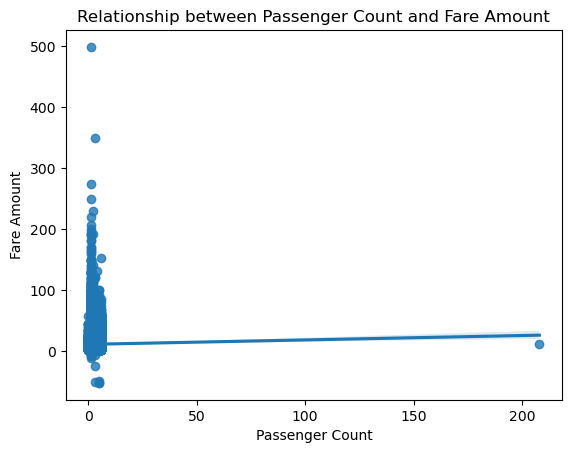

In [10]:
# Scatter plot with regression line
sns.regplot(x='passenger_count', y='fare_amount', data=uber)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Relationship between Passenger Count and Fare Amount')
plt.show()

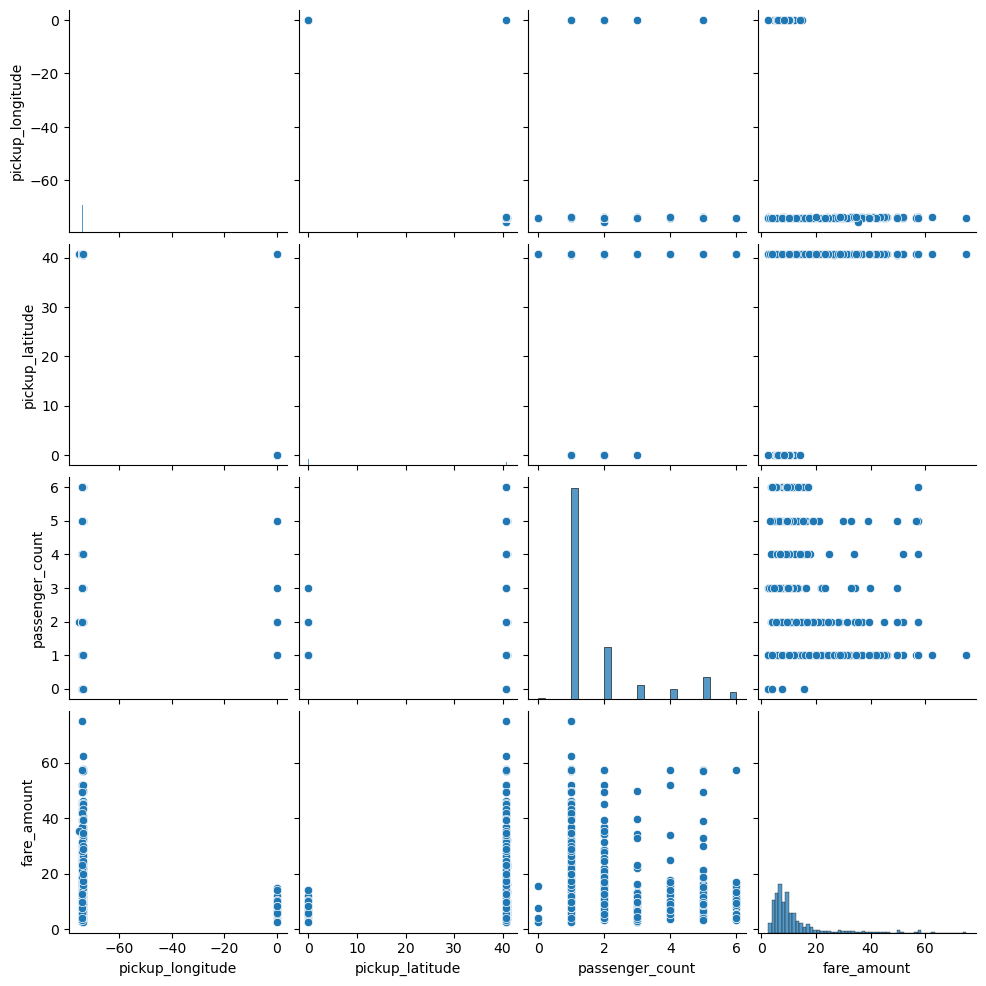

In [11]:
import warnings
warnings.filterwarnings("ignore")
# Sample a subset of the data for faster plotting (optional)
sampled_data = uber.sample(n=1000)

# Pairplot
sns.pairplot(data=sampled_data, vars=['pickup_longitude', 'pickup_latitude', 'passenger_count', 'fare_amount'])
plt.show()

## Step 3: Feature Engineering
Lets create new features

In [12]:
# Convert 'pickup_datetime' column to datetime data type
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

In [13]:
# Extract relevant features from datetime column
uber['pickup_hour'] = uber['pickup_datetime'].dt.hour
uber['pickup_dayofweek'] = uber['pickup_datetime'].dt.dayofweek

In [14]:
# Select predictive variables and target variable
X = uber[['pickup_hour', 'pickup_dayofweek', 'pickup_longitude', 'pickup_latitude', 'passenger_count']]
y = uber['fare_amount']

## Step 4:Preparing the data for modelling

### Splitting into train & test

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
# Evaluate the model
print("Training R^2 score:", r2_score(y_train, y_train_pred))
print("Testing R^2 score:", r2_score(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Training R^2 score: 0.0007059390148672628
Testing R^2 score: 0.000660307260434867
Mean Squared Error: 103.61991454836728


### Residual Analysis

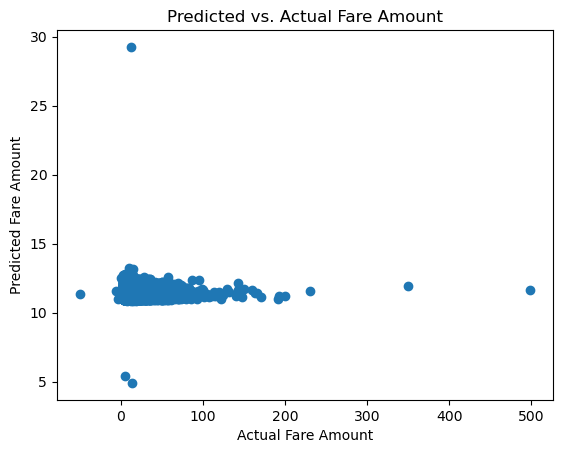

In [23]:
# Plot predictions vs. actual values for the testing set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Predicted vs. Actual Fare Amount")
plt.show()

<Figure size 640x480 with 0 Axes>

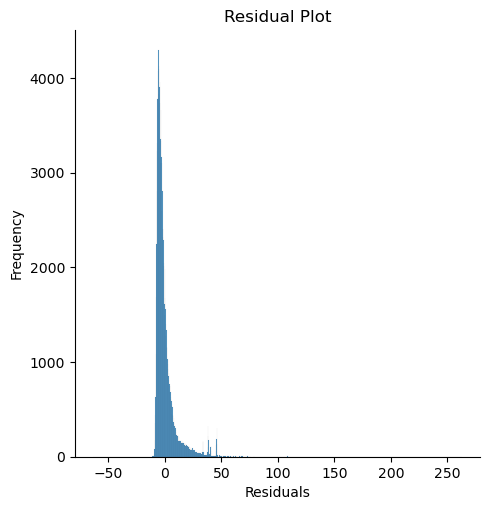

In [22]:
# Residual plot
residuals = y_train - y_train_pred
plt.figure()
sns.displot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.show()

## Step 5:Data Scaling / Normalization

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6:Correlation Analysis

In [24]:
# Drop non-numeric columns
uber_numeric = uber.drop(columns=['pickup_datetime', 'key'])

# Calculate correlation matrix
corr_matrix = uber_numeric.corr()

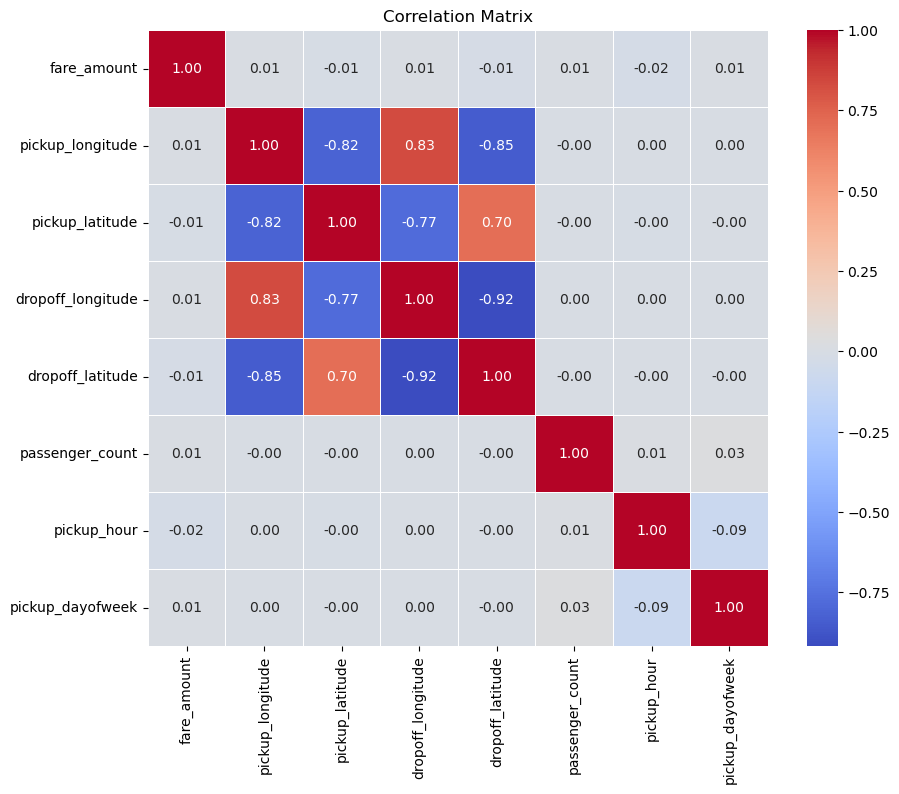

In [25]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# COMPONENT 3 

## Step 1: Let us first import necessary libraries 

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Step 2:Preparing the data for modelling

### Splitting into train & test

In [27]:
# Split the data into features (X) and target (y)
X = uber[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'passenger_count']]
y = uber['fare_amount']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 1: Select and Train the Regression Model

In [29]:
# Convert 'pickup_datetime' to datetime object
X_train['pickup_datetime'] = pd.to_datetime(X_train['pickup_datetime'])

In [30]:
# Extract relevant features
X_train['pickup_hour'] = X_train['pickup_datetime'].dt.hour
X_train['pickup_day'] = X_train['pickup_datetime'].dt.day
X_train['pickup_month'] = X_train['pickup_datetime'].dt.month
X_train['pickup_year'] = X_train['pickup_datetime'].dt.year

# Drop the original 'pickup_datetime' column
X_train.drop(columns=['pickup_datetime'], inplace=True)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Initialize the Random Forest Regression model with optimized hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [33]:
# Train the model using a subset of the training set
X_train_subset = X_train.iloc[:10000]
y_train_subset = y_train.iloc[:10000]

In [34]:
# Initialize the Random Forest Regression model with optimized hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [35]:
# Train the model using the subset of the training set
rf_regressor.fit(X_train_subset, y_train_subset)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [36]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Task 2: Evaluate the Regression Model

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
# Convert 'pickup_datetime' to datetime object
X_test['pickup_datetime'] = pd.to_datetime(X_test['pickup_datetime'])

# Extract relevant features
X_test['pickup_hour'] = X_test['pickup_datetime'].dt.hour
X_test['pickup_day'] = X_test['pickup_datetime'].dt.day
X_test['pickup_month'] = X_test['pickup_datetime'].dt.month
X_test['pickup_year'] = X_test['pickup_datetime'].dt.year

# Drop the original 'pickup_datetime' column
X_test.drop(columns=['pickup_datetime'], inplace=True)

In [39]:
# Make predictions on the training set
y_train_pred = rf_regressor.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_regressor.predict(X_test)

In [40]:
# Calculate evaluation metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [41]:
# Calculate evaluation metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test R-squared:", test_r2)

Training MSE: 10.029954144305343
Training MAE: 1.961668849454367
Training R-squared: 0.8955131528427078
Test MSE: 78.77436506403043
Test MAE: 5.29261488244709
Test R-squared: 0.2339496459754964


# Task 3: Fine-tuning the Regression Model

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Define a subset of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [44]:
# Initialize the Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)

In [45]:
# Train the model using a subset of the training set
X_train_subset = X_train.iloc[:5000]
y_train_subset = y_train.iloc[:5000]

In [46]:
# Fit Grid Search CV to the training data
rf_regressor.fit(X_train_subset, y_train_subset)

RandomForestRegressor(random_state=42)

In [47]:
# Get the hyperparameters used in the model
hyperparameters = rf_regressor.get_params()
print("Hyperparameters:", hyperparameters)

Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit Grid Search CV to the training data
grid_search.fit(X_train_subset, y_train_subset)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [50]:
# Get the best model
best_rf_regressor = grid_search.best_estimator_

In [51]:
# Evaluate the best model on the test data
y_pred = best_rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 77.00765694255625


In [52]:
# Make predictions using the best model
best_y_test_pred = best_rf_regressor.predict(X_test)

In [53]:
# Evaluate the best model
best_test_mse = mean_squared_error(y_test, best_y_test_pred)
best_test_mae = mean_absolute_error(y_test, best_y_test_pred)
best_test_r2 = r2_score(y_test, best_y_test_pred)

print("Best Test MSE:", best_test_mse)
print("Best Test MAE:", best_test_mae)
print("Best Test R-squared:", best_test_r2)

Best Test MSE: 77.00765694255625
Best Test MAE: 5.0845117080183195
Best Test R-squared: 0.25113020186843427


## COMPONENT 4

### Task 1: Evaluate Model Performance

In [54]:
# 1. IMPORT NECESSARY LIBRARY
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [56]:
# Prepare the data for modeling
# Split the data into features (X) and target (y)
X = uber[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'passenger_count']]
y = uber['fare_amount']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Convert 'pickup_datetime' to datetime object
X_train['pickup_datetime'] = pd.to_datetime(X_train['pickup_datetime'])
X_test['pickup_datetime'] = pd.to_datetime(X_test['pickup_datetime'])

In [59]:
# Extract relevant features
X_train['pickup_hour'] = X_train['pickup_datetime'].dt.hour
X_train['pickup_day'] = X_train['pickup_datetime'].dt.day
X_train['pickup_month'] = X_train['pickup_datetime'].dt.month
X_train['pickup_year'] = X_train['pickup_datetime'].dt.year

In [60]:
X_test['pickup_hour'] = X_test['pickup_datetime'].dt.hour
X_test['pickup_day'] = X_test['pickup_datetime'].dt.day
X_test['pickup_month'] = X_test['pickup_datetime'].dt.month
X_test['pickup_year'] = X_test['pickup_datetime'].dt.year

In [61]:
# Drop the original 'pickup_datetime' column
X_train.drop(columns=['pickup_datetime'], inplace=True)
X_test.drop(columns=['pickup_datetime'], inplace=True)

In [62]:
# Initialize the Random Forest Regression model with optimized hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [63]:
# Train the model using a subset of the training set
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [64]:
# Make predictions on the training and test sets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

In [65]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test R-squared:", test_r2)

Training MSE: 10.029954144305341
Training MAE: 1.961668849454367
Training R-squared: 0.8955131528427078
Test MSE: 78.77436506403043
Test MAE: 5.292614882447089
Test R-squared: 0.2339496459754964


### Task 2: Interpret Feature Importance

In [66]:
# Feature importance analysis
feature_importance = rf_regressor.feature_importances_
feature_names = X_train.columns

In [67]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

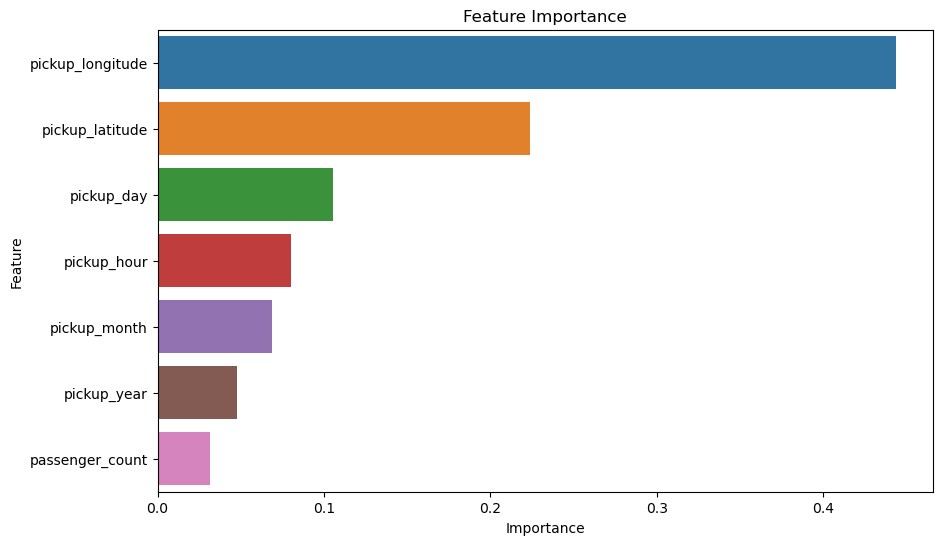

Top Features:
            Feature  Importance
0  pickup_longitude    0.443351
1   pickup_latitude    0.223726
4        pickup_day    0.105153
3       pickup_hour    0.080211
5      pickup_month    0.068492


In [68]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the top features with the highest importance
print("Top Features:")
print(feature_importance_df.head())

### Task 3: Make Predictions on New Data

In [69]:
# Generate synthetic ride data
num_new_rides = 10  # Number of new rides to generate

In [70]:
# Creating a DataFrame with synthetic ride data
new_rides_data = {
    'pickup_datetime': pd.date_range(start='2024-05-01', periods=num_new_rides, freq='H'),
    'pickup_longitude': np.random.uniform(low=-74.05, high=-73.75, size=num_new_rides),
    'pickup_latitude': np.random.uniform(low=40.60, high=40.90, size=num_new_rides),
    'passenger_count': np.random.randint(low=1, high=6, size=num_new_rides)
}

new_rides = pd.DataFrame(new_rides_data)

# Display the new ride data
print("New Ride Data:")
print(new_rides)

New Ride Data:
      pickup_datetime  pickup_longitude  pickup_latitude  passenger_count
0 2024-05-01 00:00:00        -73.811078        40.813773                1
1 2024-05-01 01:00:00        -73.831908        40.899748                2
2 2024-05-01 02:00:00        -73.777285        40.756918                2
3 2024-05-01 03:00:00        -73.878205        40.839449                4
4 2024-05-01 04:00:00        -74.015503        40.871923                2
5 2024-05-01 05:00:00        -73.764245        40.676997                3
6 2024-05-01 06:00:00        -73.795015        40.709820                4
7 2024-05-01 07:00:00        -74.021116        40.789778                4
8 2024-05-01 08:00:00        -74.042141        40.888083                3
9 2024-05-01 09:00:00        -73.980012        40.861310                3


In [71]:
# Convert 'pickup_datetime' column to datetime object
new_rides['pickup_datetime'] = pd.to_datetime(new_rides['pickup_datetime'])

In [72]:
# Extract relevant features from datetime column
new_rides['pickup_hour'] = new_rides['pickup_datetime'].dt.hour
new_rides['pickup_day'] = new_rides['pickup_datetime'].dt.day
new_rides['pickup_month'] = new_rides['pickup_datetime'].dt.month
new_rides['pickup_year'] = new_rides['pickup_datetime'].dt.year

In [73]:
# Drop the original 'pickup_datetime' column
new_rides.drop(columns=['pickup_datetime'], inplace=True)

# Make predictions using the trained model
fare_predictions = rf_regressor.predict(new_rides)

# Display the predicted fare amounts
print("Predicted Fare Amounts:")
print(fare_predictions)

Predicted Fare Amounts:
[23.3903 21.45   25.2227 33.7939 49.4677 42.6843 41.7714 23.5859 46.5774
 21.0789]


### Task 4:Provide Recommendations

Based on the analysis and insights obtained from the regression model, here are some recommendations for the ride-sharing company:

1. *Dynamic Pricing Strategies:* Let's make our pricing as dynamic as the cities we serve! By using the fare prediction model, we can tweak our pricing based on the time of day, day of the week, number of passengers, and where the ride starts and ends. This way, we can optimize fares to match demand without breaking the bank for our riders.

2. Driver Incentives:* Let's give our drivers some love too! With insights from the model, we can offer bonuses or rewards for taking on rides with higher predicted fares. This will motivate them to jump on longer trips or pick up passengers during busy hours, all while keeping their spirits high.

3. *Service Improvements:* Time to up our game! By listening to what the model tells us, we can pinpoint areas where we need to shine brighter. If it says fares are higher at certain times or in specific spots, let's deploy more drivers there to keep our riders happy and the wheels turning smoothly.

4. *Customer Targeting:* Everyone loves a good deal, right? Let's use the model to understand our riders better and offer them promotions or discounts tailored to their preferences. This way, we can encourage more rides during quieter periods or in areas that need a little boost.

5. *Route Optimization:* Let's help our drivers take the scenic (and efficient) route! By leveraging the model's insights, we can suggest better routes that save time and fuel. It's a win-win for our drivers and our riders, keeping everyone happy and moving forward.

These recommendations stem from what the regression model tells us about the significance of factors like pickup location, time, and passenger count in determining fare amounts. By putting these insights into action, we can run a tighter ship, boost revenue, and keep our riders smiling mile after mile.